# FBI Gun Data

The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.

The NICS data is found in one sheet of an .xlsx file. It contains the number of firearm checks by month, state, and type.
The U.S. census data is found in a .csv file. It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year.
<ol>
    <li>What census data is most associated with high gun per capita?</li>
    <li>Which states have had the highest growth in gun registrations?</li> 
    <li>What is the overall trend of gun purchases?</li>
</ol>

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#%pylab inline
%matplotlib inline

gun_data = pd.read_csv('gun_data.csv')
US_Census_Data = pd.read_csv('US_Census_Data.csv')

In [3]:
gun_data.head(3)#check the data reading

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394


In [4]:
US_Census_Data.head(3)#check the data reading

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%


## State v.s handgun and long gun
Check the distribution of gun v.s state. We may find which state got most of guns.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text xticklabel objects>)

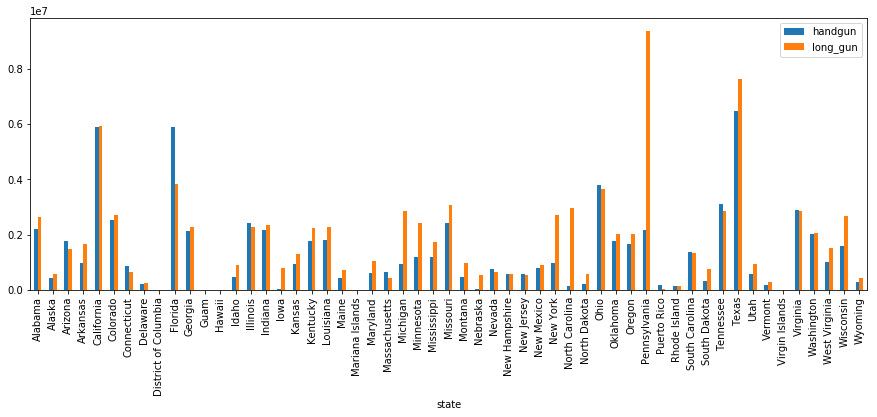

In [5]:
state_vs_gun = gun_data.groupby(['state'], as_index = False)['handgun','long_gun'].sum()
state_vs_gun.plot(x='state',kind='bar', figsize=(15,5))
plt.xticks(rotation=90)
#maybe we can modify y axis

## Which states have had the highest growth in gun registrations?

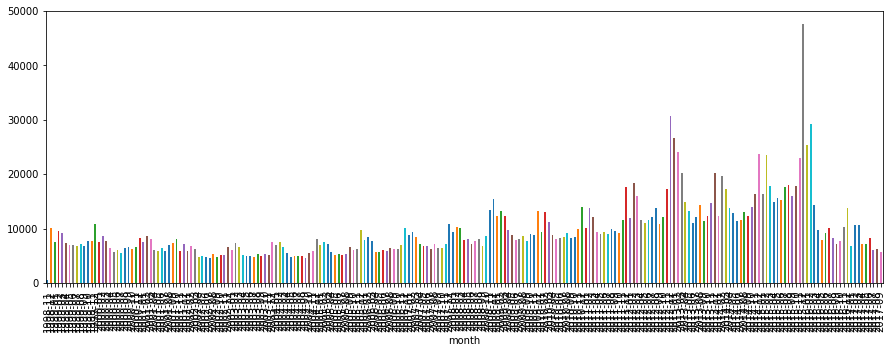

In [33]:
time_vs_handgun = gun_data.groupby(['month','state'], as_index = False)['handgun'].sum()
time_vs_handgun_reshape = time_vs_handgun.pivot(index='month', columns='state', values='handgun')
time_vs_handgun_reshape['Alabama'].plot(kind='bar',stacked = True, figsize=(15,5))

In [31]:
time_vs_handgun_reshape

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
month,,,,,,,,,,,,,,,,,,,,,
1998-11,449.0,71.0,169.0,149.0,717.0,181.0,19.0,14.0,0.0,319.0,...,19.0,1384.0,98.0,23.0,0.0,14.0,65.0,149.0,25.0,45.0
1998-12,10118.0,1294.0,6988.0,4500.0,27924.0,7744.0,1502.0,493.0,0.0,11188.0,...,9110.0,22478.0,2835.0,635.0,0.0,7832.0,1760.0,4195.0,3837.0,925.0
1999-01,7516.0,830.0,5937.0,3720.0,25989.0,8336.0,1636.0,419.0,0.0,9287.0,...,9581.0,18123.0,2041.0,427.0,0.0,6298.0,1891.0,2989.0,2709.0,668.0
1999-02,9630.0,941.0,7157.0,5382.0,27909.0,10028.0,1736.0,477.0,2.0,11269.0,...,12332.0,21500.0,2575.0,656.0,0.0,7688.0,2287.0,3987.0,3584.0,831.0
1999-03,9151.0,1205.0,7261.0,4886.0,32639.0,7867.0,2042.0,572.0,2.0,12149.0,...,12141.0,21305.0,2479.0,699.0,0.0,8401.0,2528.0,4194.0,5661.0,986.0
1999-04,7371.0,1381.0,7249.0,4308.0,28837.0,5235.0,2188.0,451.0,2.0,10294.0,...,9218.0,17864.0,2624.0,497.0,0.0,6437.0,1963.0,3425.0,6667.0,1008.0
1999-05,7005.0,1140.0,6301.0,3834.0,27813.0,4945.0,2204.0,497.0,1.0,10183.0,...,8924.0,17729.0,2308.0,411.0,0.0,6627.0,2151.0,3005.0,4722.0,927.0
1999-06,7010.0,1174.0,5771.0,3822.0,27990.0,4846.0,1656.0,389.0,1.0,10450.0,...,9103.0,17081.0,1697.0,430.0,0.0,5730.0,2331.0,2861.0,3552.0,868.0
1999-07,6770.0,1297.0,5947.0,3712.0,27758.0,4733.0,1572.0,345.0,2.0,10279.0,...,9415.0,19189.0,1712.0,441.0,0.0,6410.0,2269.0,3050.0,3258.0,816.0


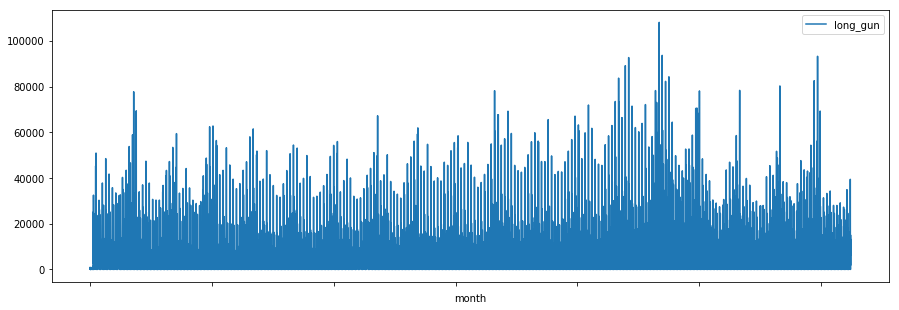

In [10]:
time_vs_long_gun = gun_data.groupby(['month','state'], as_index = False)['long_gun'].sum()
time_vs_long_gun.plot(x='month',kind='line', figsize=(15,5))

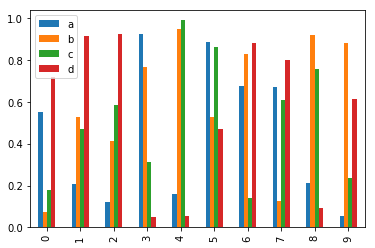

In [13]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot.bar()

In [15]:
df2

,a,b,c,d
0,0.549637,0.074600,0.177518,0.720892
1,0.208369,0.527398,0.472279,0.916909
2,0.123300,0.412797,0.585207,0.925172
3,0.924713,0.766939,0.314420,0.050956
4,0.158183,0.950532,0.990143,0.053255
5,0.886483,0.527961,0.863323,0.470680
6,0.675802,0.827736,0.141002,0.883718
7,0.672351,0.128528,0.609468,0.802305
8,0.213415,0.920844,0.756791,0.093464
9,0.055850,0.882551,0.233963,0.613605


## What census data is most associated with high gun per capita?


## What is the overall trend of gun purchases?